In [4]:
from arc import *

Rubidium light interaction continued

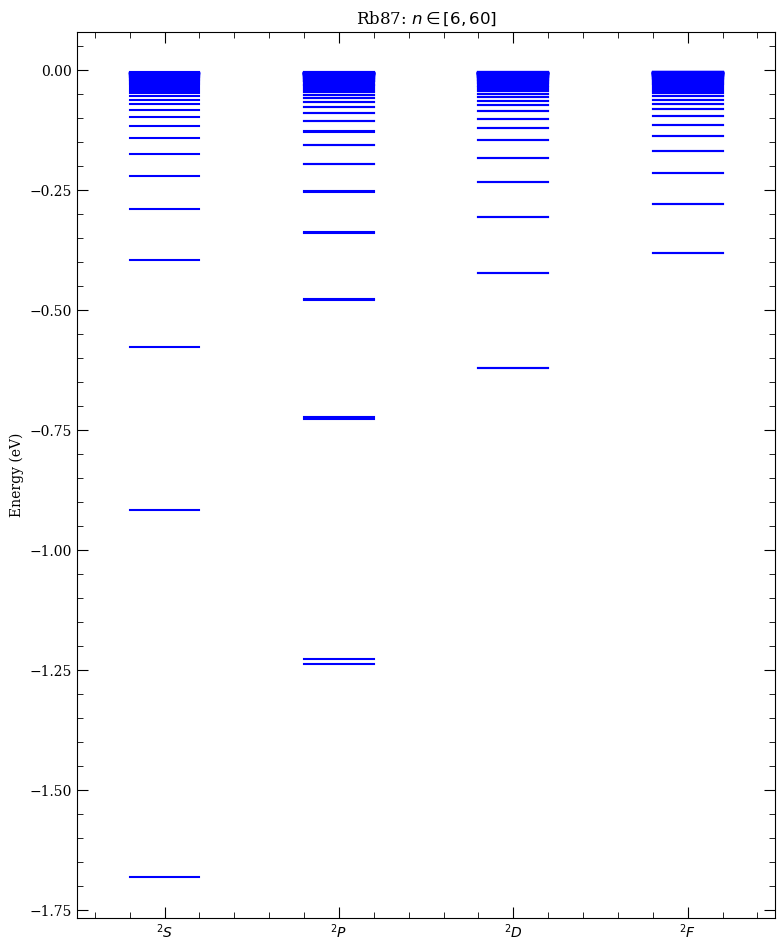

In [5]:
# Load parameters for Rubidium
atom = Rubidium87()

nmin = 6  # Minimum n
nmax = 60  # Maximum n
lmin = 0  # Minimum l
lmax = 3  # Maxmium l

# Plot Energy Levels of Cesium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax)
levels.drawLevels()
levels.showPlot()

Calculate Rabi Frequency $\Omega$ of atomic tranistion

In [23]:
# Laser Parameters
waist = 50.0e-6  # 50 mu m
P = 1.0e-3  # 500 mW
n1 = 5
l1 = 0
j1 = 1/2
n2 = 5
l2 = 1
j2 = 3/2
mj1 = 0.5
mj2 = 1.5
q = +1
# Light Polarisation (sigma+)


In [22]:
rabiFreq = atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2)
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)

lambda = 780.242 nm


In [24]:

rabiFreq = atom.getRabiFrequency(n1, l1, j1, mj1, n2, l2, j2, q, P, waist)
print("rabi Frequency = 2 pi x %.2f MHz" % (rabiFreq / (2 * np.pi) * 1e-6))

rabi Frequency = 2 pi x 529.79 MHz


Rydberg interactions

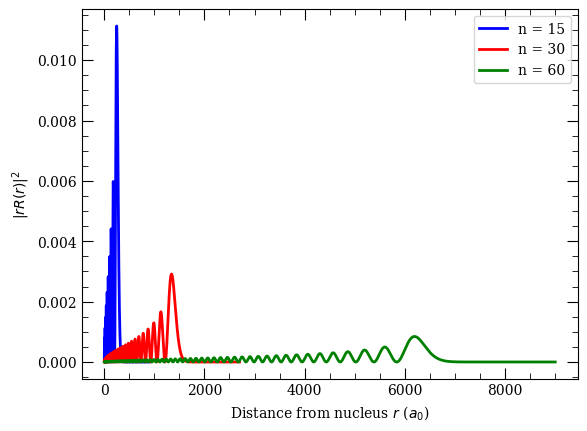

In [6]:
pqn = [15, 30, 60]  # principal quantum numbers of the states
colors = ["b", "r", "g"]
l = 0  # S state
j = 0.5  # J = 1/2

plotLegend = []
for i in range(len(pqn)):
    n = pqn[i]
    step = 0.001
    a1, b1 = atom.radialWavefunction(
        l,
        0.5,
        j,
        atom.getEnergy(n, l, j) / 27.211,
        atom.alphaC ** (1 / 3.0),
        2.0 * n * (n + 15.0),
        step,
    )
    (legendInfo,) = plt.plot(
        a1, (b1) * (b1), "-", lw=2, color=colors[i], label=("n = %d" % n)
    )
    plotLegend.append(legendInfo)

plt.legend(handles=plotLegend)
plt.xlabel(r"Distance from nucleus $r$ ($a_0$)")
plt.ylabel(r"$\vert rR(r)\vert^2$")
plt.show()

How do we excite the Rydberg state?

In [25]:


atom = Rubidium()
print("5 S_{1/2} -> 5 P_{3/2}")
print("%.3f nm " % (atom.getTransitionWavelength(5, 0, 0.5, 5, 1, 1.5) * 1e9))
print("%.3f THz " % (atom.getTransitionFrequency(5, 0, 0.5, 5, 1, 1.5) * 1e-12))
print("5 P_{3/2} -> 60 S_{1/2}")
print("%.3f nm " % (atom.getTransitionWavelength(5, 1, 1.5, 60, 0, 0.5) * 1e9))
print(
    "%.3f THz " % (atom.getTransitionFrequency(5, 1, 1.5, 60, 0, 0.5) * 1e-12)
)

5 S_{1/2} -> 5 P_{3/2}
780.242 nm 
384.230 THz 
5 P_{3/2} -> 60 S_{1/2}
479.839 nm 
624.777 THz 


In [26]:
# Dipole-Interaction Dispersion Coefficient:60S1/2
# ================================================
# Evaluation of the Cs 60S_1/2 C6 coefficient using perturbation theory (Theta=0,phi=0)
n0 = 50
l0 = 0
j0 = 0.5
mj0 = 0.5
# Target State
theta = 0
# Polar Angle [0-pi]
phi = 0
# Azimuthal Angle [0-2pi]
dn = 5
# Range of n to consider (n0-dn:n0+dn)
deltaMax = 25e9  # Max pair-state energy difference [Hz]

# Set target-state and extract value
calculation = PairStateInteractions(
    Rubidium(), n0, l0, j0, n0, l0, j0, mj0, mj0
)
C6 = calculation.getC6perturbatively(theta, phi, dn, deltaMax)
print("C6 [%s] = %.2f GHz (mum)^6" % (printStateString(n0, l0, j0), C6))


C6 [50 S 1/2] = -15.44 GHz (mum)^6


Hints for C-phase gate

In [ ]:
def H_coeff(t,A,B,dt):
    acc=0
    for ii in range(np.size(A)):
        acc=acc+A[ii]*np.heaviside(t-dt[ii],1)*np.heaviside(-t+(dt[ii]+B[ii]),1)
    return acc

qub0=basis(dim,0)
qub1=basis(dim,1)
rydb=basis(dim,2)

H_1r=1/2* qub1 * rydb.dag()
H_1r=H_1r+H_1r.dag()

H_Delta_rr=rydb*rydb.dag()


